In [2]:
from __future__ import print_function, division
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

In [15]:
import warnings
warnings.filterwarnings("ignore")

plt.ion()

In [32]:
image_width = 768
image_height = 768

In [55]:
def rle_decode(rle_image):
    image_array = np.zeros(image_width*image_height)
    for rle_tuple in rle_image:
        number_of_pixels = int(rle_tuple[1])
        pixel = int(rle_tuple[0])
        for i in range(number_of_pixels):
            pixel = int(pixel)
            image_array[pixel + i] = 1
    return np.reshape(image_array, (image_width, image_height), order='F')

print(ships[:4])
print(rle_decode(ships[:4]))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [79]:
ships_frame = pd.read_csv('data/train_ship_segmentations_v2.csv')

n = 64
img_name = ships_frame.iloc[n, 0]
ships = ships_frame.iloc[n, 1].split(' ')
print(ships)
ships = np.asarray(ships).reshape(-1, 2)
ships = rle_decode(ships)

print('Image name: {}'.format(img_name))
print('Landmarks shape: {}'.format(ships.shape))

['172862', '2', '173628', '4', '174394', '7', '175160', '9', '175926', '12', '176692', '14', '177459', '16', '178227', '16', '178996', '16', '179764', '16', '180533', '16', '181301', '16', '182070', '16', '182838', '16', '183607', '16', '184375', '16', '185144', '16', '185912', '16', '186681', '16', '187449', '16', '188218', '16', '188986', '16', '189755', '16', '190523', '16', '191292', '16', '192060', '16', '192829', '16', '193597', '16', '194366', '16', '195134', '16', '195903', '15', '196671', '16', '197440', '15', '198208', '16', '198977', '15', '199745', '16', '200513', '16', '201282', '16', '202050', '16', '202819', '16', '203587', '16', '204356', '16', '205124', '16', '205893', '16', '206661', '16', '207430', '16', '208198', '16', '208967', '16', '209735', '16', '210504', '16', '211272', '16', '212041', '16', '212809', '16', '213578', '16', '214346', '16', '215115', '16', '215883', '16', '216652', '16', '217420', '16', '218189', '13', '218957', '11', '219726', '8', '220494', '6

00113a75c.jpg


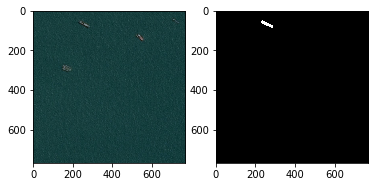

In [80]:
def show_landmarks(image, ships):
    plt.subplot(1,2,1)
    plt.imshow(image)
    plt.subplot(1,2,2)
    plt.imshow(ships, 'gray')
    plt.pause(0.001)  # pause a bit so that plots are updated

plt.figure()
print(img_name)
show_landmarks(io.imread(os.path.join('data/train_v2', img_name)),
               ships)
plt.show()